This file has car sell prices for 3 different models. First plot data points on a scatter plot chart to see if linear regression model can be applied. If yes, then build a model that can answer following questions,

1) Predict price of a mercedez benz that is 4 yr old with mileage 45000

2) Predict price of a BMW X5 that is 7 yr old with mileage 86000

3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

from sklearn.linear_model import LinearRegression

## Importing

In [2]:
df = pd.read_csv("data/carprices-exercise.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [3]:
df1 = pd.read_csv("data/carprices-exercise.csv", index_col ="Car Model" )
df2 = pd.read_csv("data/carprices-exercise.csv", index_col ="Car Model" )
df3 = pd.read_csv("data/carprices-exercise.csv", index_col ="Car Model" )

In [4]:
df1.drop(["Audi A5", "Mercedez Benz C class"], inplace = True)
df2.drop(["BMW X5", "Mercedez Benz C class"], inplace = True)
df3.drop(["BMW X5", "Audi A5"], inplace = True)

,Mileage,Sell Price($),Age(yrs)
Car Model,,,
Mercedez Benz C class,67000,22000,6
Mercedez Benz C class,83000,20000,7
Mercedez Benz C class,79000,21000,7
Mercedez Benz C class,59000,33000,5


In [21]:
df1.rename(columns = {'Sell Price($)':'Price'}, inplace = True)
df1.rename(columns = {'Age(yrs)':'Age'}, inplace = True)
df2.rename(columns = {'Sell Price($)':'Price'}, inplace = True)
df2.rename(columns = {'Age(yrs)':'Age'}, inplace = True)
df3.rename(columns = {'Sell Price($)':'Price'}, inplace = True)
df3.rename(columns = {'Age(yrs)':'Age'}, inplace = True)

In [37]:
# BMW X5
x1 = df1.Age
y1  = df1.Price
z1 = df1.Mileage

# Audi A5
x2 = df2.Age
y2  = df2.Price
z2 = df2.Mileage

# Mercedes Benz C Class
y3  = df3.Price
x3 = df3.Age
z3 = df3.Mileage

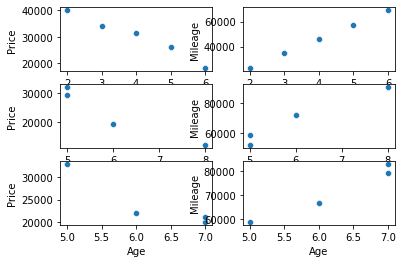

In [68]:
f, axes = plt.subplots(3,2) # Divide the plot into 3 rows, 2 columns

# Draw the plot in first row second column
sns.scatterplot(x1, y1, data=df1, ax=axes[0][0]) # Draw the plot in first row first column
sns.scatterplot(x1, z1, data=df1, ax=axes[0][1]) # Draw the plot in first row second column

sns.scatterplot(x2, y2, data=df2, ax=axes[1][0])
sns.scatterplot(x2, z2, data=df2, ax=axes[1][1])

sns.scatterplot(x3, y3, data=df3, ax=axes[2][0])
sns.scatterplot(x3, z3, data=df3, ax=axes[2][1])

# to ignore a weird warning - not recommend to include
################################################################
import warnings
warnings.filterwarnings('ignore')
################################################################

## Data pre-processing

In [64]:
# checking for null values
df.isna().sum()

Car Model        0
Mileage          0
Sell Price($)    0
Age(yrs)         0
dtype: int64

### Dummy Variable encoding

In [9]:
# Convert the categorical data into numbers - Dummy variable Encoding

dummies = pd.get_dummies(df[['Car Model']])
dummies

,Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [10]:
merged_df = pd.concat([df, dummies], axis = 'columns')
merged_df

,Car Model,Mileage,Sell Price($),Age(yrs),Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [11]:
# drop columns town and any town column. Here we are dropping monroe township column

dropped_df = merged_df.drop(['Car Model','Car Model_Audi A5'], axis = 'columns')
dropped_df

,Mileage,Sell Price($),Age(yrs),Car Model_BMW X5,Car Model_Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [12]:
# from sklearn.linear_model import LinearRegression
model = LinearRegression()

# x = features
x = dropped_df.drop('Sell Price($)', axis='columns')
x

,Mileage,Age(yrs),Car Model_BMW X5,Car Model_Mercedez Benz C class
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0
5,59000,5,0,0
6,52000,5,0,0
7,72000,6,0,0
8,91000,8,0,0
9,67000,6,0,1


In [13]:
y = merged_df['Sell Price($)'] 

y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y);


model.score(x,y)

0.9417050937281082

In [15]:
# Price of mercedez benz that is 4 yr old with mileage 45000
model.predict([[45000,4,0,1]])

array([36991.31721061])

In [16]:
# Price of BMW X5 that is 7 yr old with mileage 86000
model.predict([[86000,7,1,0]])

array([11080.74313219])

In [17]:
# table for prediction reference
# audi a5 = (1, 0, 0) or (0, 0)
# BMW x5 = (0, 1, 0) or (1, 0)
# Mercedes = (0, 0, 1) or (0, 1)
merged_df 

,Car Model,Mileage,Sell Price($),Age(yrs),Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [18]:
# clean code

import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

df = pd.read_csv("data/carprices-exercise.csv")
df1 = pd.read_csv("data/carprices-exercise.csv", index_col ="Car Model" )
df1.drop(["Audi A5", "Mercedez Benz C class"], inplace = True)
df.isna().sum()
dummies = pd.get_dummies(df[['Car Model']])
merged_df = pd.concat([df, dummies], axis = 'columns')
dropped_df = merged_df.drop(['Car Model','Car Model_Audi A5'], axis = 'columns')
model = LinearRegression()
x = dropped_df.drop('Sell Price($)', axis='columns')
y = merged_df['Sell Price($)']
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y);

print(f'Model Score = {model.score(x,y) * 100} %')

# Price of mercedez benz that is 4 yr old with mileage 45000
print(f'Mercedes Benz that is 4 yr old with 45000 mileage = {model.predict([[45000,4,0,1]])}')

# Price of BMW X5 that is 7 yr old with mileage 86000
print(f'BMW X5 that is 7 yr old with 86000 mileage = {model.predict([[86000,7,1,0]])}')


Model Score = 94.17050937281081 %
Mercedes Benz that is 4 yr old with 45000 mileage = [36991.31721061]
BMW X5 that is 7 yr old with 86000 mileage = [11080.74313219]
